## algorithm design and anlysis-2025 spring  homework 4
**Deadline**：2025.5.14

**name**: 秦瑞宏
# 本次作业基于大模型辅助完成

note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1 
**最小生成树（Minimum Spanning Tree）**

设  **G**  为一个带权重的连通无向图，且所有边的权重均不相等。令$e_i$ 为权重第 $i$ 小的边。最小生成树（MST）是否必须包含 $e_1$ ? 同理，是否必须包含 $e_2$ 和 $e_3$ ? 若必须包含，请给出证明；否则，请构造反例。需从基本原理论证，不能依赖割引理(cut lemma) 或 Prim/Kruskal算法的正确性。


answer:
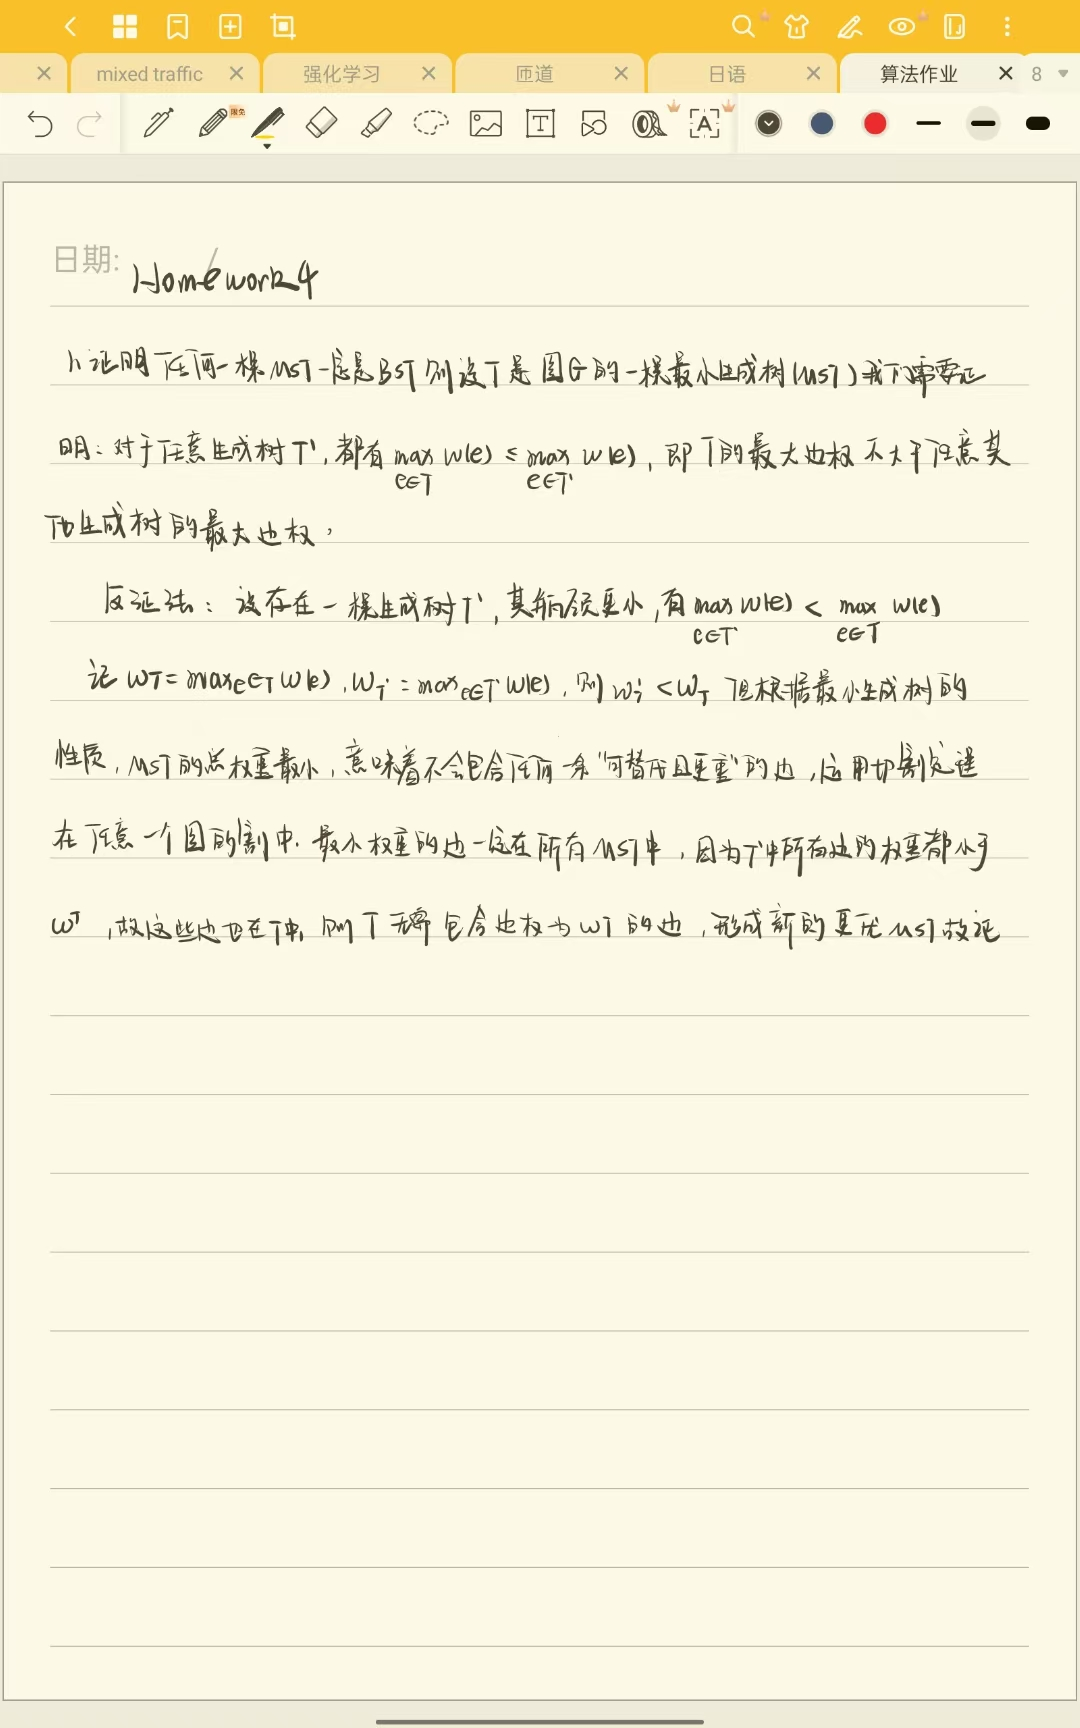

## 问题 2 
**瓶颈生成树（Bottleneck Spanning Tree）**

带有权重的无向图 $G(V,E,w)$ 的瓶颈生成树，表现为：在所有生成树中，最大权重边的权重值最小。即，BST $T$ 最小化瓶颈损失 $c(T)=max_{e \in T}{w(e)}$。

1. 证明 $G$ 的每一个最小生成树（MST）都是瓶颈生成树（BST）
2. 设计一个线性时间复杂度的算法：， 对于一个图 $G(V,E,w)$ 和一个整数 $b$，判断图 $ G$ 是否存在一个瓶颈生成树，其最大权重边的权重不超过 $b$，分析算法设计思路，并基于python编程实现。
3. 设计一个线性时间复杂度的算法：对于给定的图 $G(V,E,w)$，找到其瓶颈生成树，分析算法设计思路，并基于python编程实现。

idea：筛选所有权重 ≤ b的边集合：E' = { e ∈ E | w(e) ≤ b }  构造子图G′ = (V, E′)判断G′ 是否连通（若连通，则存在生成树）
时间复杂度分析： 筛选边：O(m)，m是边数BFS / DFS判断连通性：O(n + m),总体：O(n + m)，线性时间

In [9]:
# add your code here
# algorithm of the liear time complexity 
from collections import defaultdict, deque
def question2_2(n, edges, b):
    graph = defaultdict(list)
    for u, v, w in edges:
        if w <= b:
            graph[u].append(v)
            graph[v].append(u)

    visited = set()
    def bfs(start):
        queue = deque([start])
        visited.add(start)
        while queue:
            node = queue.popleft()
            for nei in graph[node]:
                if nei not in visited:
                    visited.add(nei)
                    queue.append(nei)

    bfs(0)
    return len(visited) == n

def question2_3(n, edges):
    parent = list(range(n))

    def find(u):
        while u != parent[u]:
            parent[u] = parent[parent[u]]
            u = parent[u]
        return u

    def union(u, v):
        pu, pv = find(u), find(v)
        if pu == pv:
            return False
        parent[pu] = pv
        return True

    edges.sort(key=lambda x: x[2])
    l, r = 0, len(edges) - 1
    result_b, result_tree = None, []

    while l <= r:
        mid = (l + r) // 2
        b = edges[mid][2]

        parent = list(range(n))
        tree = []
        for u, v, w in edges:
            if w <= b and union(u, v):
                tree.append((u, v, w))
            if len(tree) == n - 1:
                break

        if len(tree) == n - 1:
            result_b, result_tree = b, tree
            r = mid - 1
        else:
            l = mid + 1

    return result_b, result_tree




123


## 问题 3

**道路网（Road Network）**

假设有一个以图 $ G(V, E, l) $ 表示的道路网络，连接了一组城市 $ V $。我们假设该网络是有向的，并且每条道路 $(u, v) \in E$ 都有一个非负的长度 $ l(u, v) $。一条新的道路即将被建造，因此有一个列表 $ E' $ 包含它可以连接的城市对。每对 $(u, v) \in E'$ 都有一个对应的长度 $ l'(u, v) $。我们希望选择一对城市，使得两个城市 $ s, t \in V $ 之间的距离减少最大。请为此问题编写一个高效的算法，并详细解释算法的正确性和复杂度。

def que3(n, edges, new_edges):
    INF = float('inf')
    dist = [[INF] * n for _ in range(n)]

    for i in range(n):
        dist[i][i] = 0
    for u, v, w in edges:
        dist[u][v] = dist[v][u] = min(dist[u][v], w)

    # Floyd-Warshall
    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    best_edge = None
    max_improvement = 0

    for u, v, w in new_edges:
        improvement = 0
        for s in range(n):
            for t in range(n):
                alt1 = dist[s][u] + w + dist[v][t]
                alt2 = dist[s][v] + w + dist[u][t]
                best = min(alt1, alt2)
                improvement = max(improvement, dist[s][t] - best)
        if improvement > max_improvement:
            max_improvement = improvement
            best_edge = (u, v, w)

    return best_edge, max_improvement


## 问题 4

**逃离问题**

一个 $ n \times n $ 的网格是一个无向图，由 $ n $ 行和 $ n $ 列的顶点组成，如下图所示。我们用 $(i,j)$ 表示第 $ i $ 行和第 $ j $ 列的顶点。除了边界顶点，网格中的所有顶点都有四个邻居，即满足 $ i = 1, i = n, j = 1 $ 或 $ j = n $ 的点 $(i,j)$。

给定网格中的 $ m \leq n^2 $ 个起点 $(x_1, y_1), (x_2, y_2), \cdots , (x_m, y_m)$，逃离问题是确定是否存在 $ m $ 条顶点不相交的路径（即路径之间不相交），从这些起点到边界上的任意 $ m $ 个不同点。例如，图1中的网格存在逃离。

(1) 该问题可以看作是一个最大流问题。考虑一个流网络，其中顶点和边都有容量。也就是说，进入任何给定顶点的总正流量受到容量限制。证明在具有边和顶点容量的网络中确定最大流可以简化为在具有可比大小的普通流网络上的最大流问题。更准确地说，你需要将一个具有顶点和边容量的网络 $ G = (V,E) $ 转换为另一个仅具有边容量的网络 $ G' = (V', E') $，使得两个网络上的最大流相同，并且你构建的新网络具有 $ V' = O(V) $ 个顶点和 $ E' = O(E) $ 条边。你可以假设网络是连通的。

(2) 描述一个解决逃离问题的高效算法，并分析其运行时间。


<div align="center"> <img alt="图片" src="./fig/escepe-p.png"> </div>
<center> 图2. 逃脱问题网格，起始顶点为黑色，其他网格顶点为白色</center>

idea：
def question4():
    class MaxFlow:
            """
            Dinic 算法求解最大流。
            """
    
            def __init__(self, N):
                self.N = N
                self.graph = [[] for _ in range(N)]
    
            def add(self, fr, to, cap):
                self.graph[fr].append([to, cap, len(self.graph[to])])
                self.graph[to].append([fr, 0, len(self.graph[fr]) - 1])
    
            def bfs_level(self, s, t, level):
                queue = deque([s])
                level[s] = 0
                while queue:
                    v = queue.popleft()
                    for to, cap, _ in self.graph[v]:
                        if cap > 0 and level[to] < 0:
                            level[to] = level[v] + 1
                            queue.append(to)
                return level[t] >= 0
    
            def dfs_flow(self, level, iter, v, t, upTo):
                if v == t:
                    return upTo
                for i in range(iter[v], len(self.graph[v])):
                    to, cap, rev = self.graph[v][i]
                    if cap > 0 and level[v] < level[to]:
                        d = self.dfs_flow(level, iter, to, t, min(upTo, cap))
                        if d > 0:
                            self.graph[v][i][1] -= d
                            self.graph[to][rev][1] += d
                            return d
                    iter[v] += 1
                return 0
    
            def max_flow(self, s, t):
                flow = 0
                INF = 10 ** 9
                while True:
                    level = [-1] * self.N
                    if not self.bfs_level(s, t, level):
                        break
                    iter = [0] * self.N
                    while True:
                        f = self.dfs_flow(level, iter, s, t, INF)
                        if f == 0:
                            break
                        flow += f
                return flow